In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [161]:
train_df = pd.read_csv('Trains.csv')
train_df.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
train_df.shape

(2100, 27)

In [163]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

In [164]:
train_df.isnull().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

In [165]:
train_df.duplicated().sum()

0

In [166]:
train_df.to_csv('train_df.csv', index=False)

In [167]:
train_df.dropna(subset=['LoanApplicationId'], inplace=True)


In [168]:
train_df.dropna(subset=['DueDate'], inplace=True)


In [169]:
train_df.dropna(subset=['ThirdPartyId'], inplace=True)

In [170]:
test_df = pd.read_csv('Test.csv')
test_df.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,2019-03-31 13:33:05,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 13:33:04,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,2019-03-31 15:04:09,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 15:04:08,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,2019-03-31 17:31:11,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:31:09,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,2019-03-31 17:32:15,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:32:14,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,2019-03-31 17:34:41,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:34:40,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302


In [171]:
test_df = pd.read_csv('Test.csv')
test_df.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,2019-03-31 13:33:05,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 13:33:04,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,2019-03-31 15:04:09,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 15:04:08,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,2019-03-31 17:31:11,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:31:09,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,2019-03-31 17:32:15,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:32:14,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,2019-03-31 17:34:41,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:34:40,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302


In [172]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            905 non-null    object 
 1   TransactionStartTime  905 non-null    object 
 2   Value                 905 non-null    float64
 3   Amount                905 non-null    float64
 4   TransactionId         905 non-null    object 
 5   BatchId               905 non-null    object 
 6   SubscriptionId        905 non-null    object 
 7   CurrencyCode          905 non-null    object 
 8   CountryCode           905 non-null    int64  
 9   ProviderId            905 non-null    object 
 10  ProductId             905 non-null    object 
 11  ProductCategory       905 non-null    object 
 12  ChannelId             905 non-null    object 
 13  TransactionStatus     905 non-null    int64  
 14  IssuedDateLoan        478 non-null    object 
 15  LoanId                4

In [173]:
test_df.duplicated().sum()

0

In [174]:
test_df.isnull().sum()

CustomerId                0
TransactionStartTime      0
Value                     0
Amount                    0
TransactionId             0
BatchId                   0
SubscriptionId            0
CurrencyCode              0
CountryCode               0
ProviderId                0
ProductId                 0
ProductCategory           0
ChannelId                 0
TransactionStatus         0
IssuedDateLoan          427
LoanId                  427
InvestorId              427
LoanApplicationId       427
ThirdPartyId            427
dtype: int64

In [175]:
test_df.dropna(subset=['IssuedDateLoan'], inplace=True)

In [176]:
test_df.to_csv('test_df.csv', index=False)

In [177]:
df = pd.read_csv('unlinked_masked_final.csv')
df.head()

,TransactionId,BatchId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime
0,TransactionId_18876,BatchId_7899,CustomerId_250,UGX,256,ProviderId_2,ProductId_8,data_bundles,ChannelId_3,2000.0,2000.0,30/6/19 22:57:49
1,TransactionId_15089,BatchId_8829,CustomerId_423,UGX,256,ProviderId_5,ProductId_7,airtime,ChannelId_3,800.0,800.0,30/6/19 22:39:11
2,TransactionId_9561,BatchId_15250,CustomerId_423,UGX,256,ProviderId_2,ProductId_10,financial_services,ChannelId_3,2000.0,2000.0,30/6/19 22:35:53
3,TransactionId_3635,BatchId_14442,CustomerId_316,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,30/6/19 19:47:00
4,TransactionId_3104,BatchId_5171,CustomerId_193,UGX,256,ProviderId_5,ProductId_1,airtime,ChannelId_3,5000.0,5000.0,30/6/19 19:11:01


In [178]:
df.shape

(16327, 12)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         16327 non-null  object 
 1   BatchId               16327 non-null  object 
 2   CustomerId            16327 non-null  object 
 3   CurrencyCode          16327 non-null  object 
 4   CountryCode           16327 non-null  int64  
 5   ProviderId            16327 non-null  object 
 6   ProductId             16327 non-null  object 
 7   ProductCategory       16327 non-null  object 
 8   ChannelId             16327 non-null  object 
 9   Amount                16327 non-null  float64
 10  Value                 16327 non-null  float64
 11  TransactionStartTime  16327 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ MB


In [180]:
df.duplicated().sum()

0

In [181]:
df.isnull().sum()

TransactionId           0
BatchId                 0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
dtype: int64

In [182]:
merged_data = pd.merge(df, train_df, on=['CustomerId'], how='inner')
merged_columns = merged_data.columns.tolist()

In [183]:
merged_data.isnull().sum()

TransactionId_x           0
BatchId_x                 0
CustomerId                0
CurrencyCode_x            0
CountryCode_x             0
ProviderId_x              0
ProductId_x               0
ProductCategory_x         0
ChannelId_x               0
Amount_x                  0
Value_x                   0
TransactionStartTime_x    0
TransactionStartTime_y    0
Value_y                   0
Amount_y                  0
TransactionId_y           0
BatchId_y                 0
SubscriptionId            0
CurrencyCode_y            0
CountryCode_y             0
ProviderId_y              0
ProductId_y               0
ProductCategory_y         0
ChannelId_y               0
TransactionStatus         0
IssuedDateLoan            0
AmountLoan                0
Currency                  0
LoanId                    0
PaidOnDate                0
IsFinalPayBack            0
InvestorId                0
DueDate                   0
LoanApplicationId         0
PayBackId                 0
ThirdPartyId        

In [184]:
merged_data.duplicated().sum()

0

In [185]:
merged_data

,TransactionId_x,BatchId_x,CustomerId,CurrencyCode_x,CountryCode_x,ProviderId_x,ProductId_x,ProductCategory_x,ChannelId_x,Amount_x,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,TransactionId_3635,BatchId_14442,CustomerId_316,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_3,1000.0,...,LoanId_1206,2019-03-27 13:26:48,1.0,InvestorId_1,2019-03-31 13:46:06,LoanApplicationId_158,PayBackId_396,ThirdPartyId_967,1.0,0.0
1,TransactionId_3635,BatchId_14442,CustomerId_316,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_3,1000.0,...,LoanId_985,2019-06-20 17:53:26,1.0,InvestorId_1,2019-04-27 14:38:07,LoanApplicationId_125,PayBackId_588,ThirdPartyId_453,1.0,0.0
2,TransactionId_19243,BatchId_14382,CustomerId_316,UGX,256,ProviderId_3,ProductId_7,airtime,ChannelId_3,1800.0,...,LoanId_1206,2019-03-27 13:26:48,1.0,InvestorId_1,2019-03-31 13:46:06,LoanApplicationId_158,PayBackId_396,ThirdPartyId_967,1.0,0.0
3,TransactionId_19243,BatchId_14382,CustomerId_316,UGX,256,ProviderId_3,ProductId_7,airtime,ChannelId_3,1800.0,...,LoanId_985,2019-06-20 17:53:26,1.0,InvestorId_1,2019-04-27 14:38:07,LoanApplicationId_125,PayBackId_588,ThirdPartyId_453,1.0,0.0
4,TransactionId_18791,BatchId_8501,CustomerId_316,UGX,256,ProviderId_3,ProductId_7,airtime,ChannelId_3,1400.0,...,LoanId_1206,2019-03-27 13:26:48,1.0,InvestorId_1,2019-03-31 13:46:06,LoanApplicationId_158,PayBackId_396,ThirdPartyId_967,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117741,TransactionId_11481,BatchId_15211,CustomerId_160,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,...,LoanId_350,2019-01-12 06:27:48,1.0,InvestorId_1,2019-02-01 14:41:42,LoanApplicationId_1088,PayBackId_1222,ThirdPartyId_51,1.0,0.0
117742,TransactionId_3038,BatchId_10408,CustomerId_160,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1200.0,...,LoanId_124,2018-12-11 17:47:32,1.0,InvestorId_1,2019-01-08 13:39:22,LoanApplicationId_274,PayBackId_1957,ThirdPartyId_1597,1.0,0.0
117743,TransactionId_3038,BatchId_10408,CustomerId_160,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1200.0,...,LoanId_981,2018-12-19 10:42:49,0.0,InvestorId_1,2019-01-11 17:48:59,LoanApplicationId_271,PayBackId_323,ThirdPartyId_597,1.0,0.0
117744,TransactionId_3038,BatchId_10408,CustomerId_160,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1200.0,...,LoanId_981,2019-01-01 17:59:18,1.0,InvestorId_1,2019-01-11 17:48:59,LoanApplicationId_271,PayBackId_965,ThirdPartyId_981,1.0,0.0


In [186]:
merged_data

,TransactionId_x,BatchId_x,CustomerId,CurrencyCode_x,CountryCode_x,ProviderId_x,ProductId_x,ProductCategory_x,ChannelId_x,Amount_x,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,TransactionId_3635,BatchId_14442,CustomerId_316,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_3,1000.0,...,LoanId_1206,2019-03-27 13:26:48,1.0,InvestorId_1,2019-03-31 13:46:06,LoanApplicationId_158,PayBackId_396,ThirdPartyId_967,1.0,0.0
1,TransactionId_3635,BatchId_14442,CustomerId_316,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_3,1000.0,...,LoanId_985,2019-06-20 17:53:26,1.0,InvestorId_1,2019-04-27 14:38:07,LoanApplicationId_125,PayBackId_588,ThirdPartyId_453,1.0,0.0
2,TransactionId_19243,BatchId_14382,CustomerId_316,UGX,256,ProviderId_3,ProductId_7,airtime,ChannelId_3,1800.0,...,LoanId_1206,2019-03-27 13:26:48,1.0,InvestorId_1,2019-03-31 13:46:06,LoanApplicationId_158,PayBackId_396,ThirdPartyId_967,1.0,0.0
3,TransactionId_19243,BatchId_14382,CustomerId_316,UGX,256,ProviderId_3,ProductId_7,airtime,ChannelId_3,1800.0,...,LoanId_985,2019-06-20 17:53:26,1.0,InvestorId_1,2019-04-27 14:38:07,LoanApplicationId_125,PayBackId_588,ThirdPartyId_453,1.0,0.0
4,TransactionId_18791,BatchId_8501,CustomerId_316,UGX,256,ProviderId_3,ProductId_7,airtime,ChannelId_3,1400.0,...,LoanId_1206,2019-03-27 13:26:48,1.0,InvestorId_1,2019-03-31 13:46:06,LoanApplicationId_158,PayBackId_396,ThirdPartyId_967,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117741,TransactionId_11481,BatchId_15211,CustomerId_160,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,...,LoanId_350,2019-01-12 06:27:48,1.0,InvestorId_1,2019-02-01 14:41:42,LoanApplicationId_1088,PayBackId_1222,ThirdPartyId_51,1.0,0.0
117742,TransactionId_3038,BatchId_10408,CustomerId_160,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1200.0,...,LoanId_124,2018-12-11 17:47:32,1.0,InvestorId_1,2019-01-08 13:39:22,LoanApplicationId_274,PayBackId_1957,ThirdPartyId_1597,1.0,0.0
117743,TransactionId_3038,BatchId_10408,CustomerId_160,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1200.0,...,LoanId_981,2018-12-19 10:42:49,0.0,InvestorId_1,2019-01-11 17:48:59,LoanApplicationId_271,PayBackId_323,ThirdPartyId_597,1.0,0.0
117744,TransactionId_3038,BatchId_10408,CustomerId_160,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1200.0,...,LoanId_981,2019-01-01 17:59:18,1.0,InvestorId_1,2019-01-11 17:48:59,LoanApplicationId_271,PayBackId_965,ThirdPartyId_981,1.0,0.0


In [198]:
merged_data.dtypes

TransactionId_x            object
BatchId_x                  object
CustomerId                 object
CurrencyCode_x             object
CountryCode_x               int64
ProviderId_x               object
ProductId_x                object
ProductCategory_x          object
ChannelId_x                object
Amount_x                    int64
Value_x                     int64
TransactionStartTime_x     object
TransactionStartTime_y     object
Value_y                     int64
Amount_y                    int64
TransactionId_y            object
BatchId_y                  object
SubscriptionId             object
CurrencyCode_y             object
CountryCode_y               int64
ProviderId_y               object
ProductId_y                object
ProductCategory_y          object
ChannelId_y                object
TransactionStatus           int64
IssuedDateLoan             object
AmountLoan                float64
Currency                   object
LoanId                     object
PaidOnDate    

In [189]:
customer_ids = merged_data["Value_x"]

# Print the selected column
print(customer_ids)

0         1000.0
1         1000.0
2         1800.0
3         1800.0
4         1400.0
           ...  
117741    1000.0
117742    1200.0
117743    1200.0
117744    1200.0
117745    1200.0
Name: Value_x, Length: 117746, dtype: float64


In [190]:
merged_data.Amount_x = merged_data['Amount_x'].astype(int)


In [192]:
merged_data.Amount_y = merged_data['Amount_y'].astype(int)


In [194]:
merged_data.Value_y = merged_data['Value_y'].astype(int)


In [195]:
merged_data.Value_x = merged_data['Value_x'].astype(int)


In [196]:
merged_data.IsThirdPartyConfirmed = merged_data['IsThirdPartyConfirmed'].astype(int)



In [197]:
merged_data.IsDefaulted = merged_data['IsDefaulted'].astype(int)


In [199]:
merged_data['TransactionId_x'].unique()


array(['TransactionId_3635', 'TransactionId_19243', 'TransactionId_18791',
       ..., 'TransactionId_12455', 'TransactionId_11481',
       'TransactionId_3038'], dtype=object)

In [200]:
merged_data['BatchId_x'].unique()


array(['BatchId_14442', 'BatchId_14382', 'BatchId_8501', ...,
       'BatchId_12132', 'BatchId_15211', 'BatchId_10408'], dtype=object)

In [201]:
merged_data['CustomerId'].unique()


array(['CustomerId_316', 'CustomerId_193', 'CustomerId_348',
       'CustomerId_499', 'CustomerId_302', 'CustomerId_334',
       'CustomerId_326', 'CustomerId_305', 'CustomerId_233',
       'CustomerId_27', 'CustomerId_488', 'CustomerId_249',
       'CustomerId_269', 'CustomerId_120', 'CustomerId_370',
       'CustomerId_287', 'CustomerId_57', 'CustomerId_296',
       'CustomerId_253', 'CustomerId_315', 'CustomerId_155',
       'CustomerId_73', 'CustomerId_66', 'CustomerId_144',
       'CustomerId_276', 'CustomerId_122', 'CustomerId_72',
       'CustomerId_297', 'CustomerId_311', 'CustomerId_34',
       'CustomerId_185', 'CustomerId_288', 'CustomerId_398',
       'CustomerId_28', 'CustomerId_39', 'CustomerId_432',
       'CustomerId_393', 'CustomerId_452', 'CustomerId_274',
       'CustomerId_166', 'CustomerId_379', 'CustomerId_390',
       'CustomerId_44', 'CustomerId_317', 'CustomerId_10',
       'CustomerId_261', 'CustomerId_402', 'CustomerId_243',
       'CustomerId_110', 'Customer

In [202]:
label_encoder = preprocessing.LabelEncoder()

In [203]:
merged_data['BatchId_x'] = label_encoder.fit_transform(merged_data['BatchId_x'])

In [204]:
merged_data['TransactionId_x'] = label_encoder.fit_transform(merged_data['TransactionId_x'])

In [205]:
merged_data['CustomerId'] = label_encoder.fit_transform(merged_data['CustomerId'])

In [206]:
merged_data['CustomerId'] = label_encoder.fit_transform(merged_data['CustomerId'])

In [208]:
merged_data['CurrencyCode_x'] = label_encoder.fit_transform(merged_data['CurrencyCode_x'])

In [209]:
merged_data['ProviderId_x'] = label_encoder.fit_transform(merged_data['ProviderId_x'])

In [210]:
merged_data['ProductCategory_x'] = label_encoder.fit_transform(merged_data['ProductCategory_x'])

In [211]:
merged_data['ChannelId_x'] = label_encoder.fit_transform(merged_data['ChannelId_x'])

In [212]:
merged_data['TransactionStartTime_x'] = label_encoder.fit_transform(merged_data['TransactionStartTime_x'])

In [213]:
merged_data['TransactionStartTime_y'] = label_encoder.fit_transform(merged_data['TransactionStartTime_y'])

In [214]:
merged_data['TransactionId_y'] = label_encoder.fit_transform(merged_data['TransactionId_y'])

In [215]:
merged_data['BatchId_y'] = label_encoder.fit_transform(merged_data['BatchId_y'])

In [216]:
merged_data['SubscriptionId'] = label_encoder.fit_transform(merged_data['SubscriptionId'])

In [241]:
merged_data['CountryCode_x'] = label_encoder.fit_transform(merged_data['CountryCode_x'])

In [217]:
merged_data['CurrencyCode_y'] = label_encoder.fit_transform(merged_data['CurrencyCode_y'])

In [218]:
merged_data['ProviderId_y'] = label_encoder.fit_transform(merged_data['ProviderId_y'])

In [219]:
merged_data['ProductId_y'] = label_encoder.fit_transform(merged_data['ProductId_y'])

In [220]:
merged_data['ChannelId_y'] = label_encoder.fit_transform(merged_data['ChannelId_y'])

In [221]:
merged_data['PayBackId'] = label_encoder.fit_transform(merged_data['PayBackId'])

In [222]:
merged_data['ThirdPartyId'] = label_encoder.fit_transform(merged_data['ThirdPartyId'])

In [234]:
merged_data['ProductCategory_y'] = label_encoder.fit_transform(merged_data['ProductCategory_y'])


In [236]:
merged_data['ProductId_x'] = label_encoder.fit_transform(merged_data['ProductId_x'])


In [238]:
merged_data.dtypes

TransactionId_x             int64
BatchId_x                   int64
CustomerId                  int64
CurrencyCode_x              int64
CountryCode_x               int64
ProviderId_x                int64
ProductId_x                 int64
ProductCategory_x           int64
ChannelId_x                 int64
Amount_x                    int64
Value_x                     int64
TransactionStartTime_x      int64
TransactionStartTime_y      int64
Value_y                     int64
Amount_y                    int64
TransactionId_y             int64
BatchId_y                   int64
SubscriptionId              int64
CurrencyCode_y              int64
CountryCode_y               int64
ProviderId_y                int64
ProductId_y                 int64
ProductCategory_y           int64
ChannelId_y                 int64
TransactionStatus           int64
IssuedDateLoan             object
AmountLoan                float64
Currency                   object
LoanId                     object
PaidOnDate    

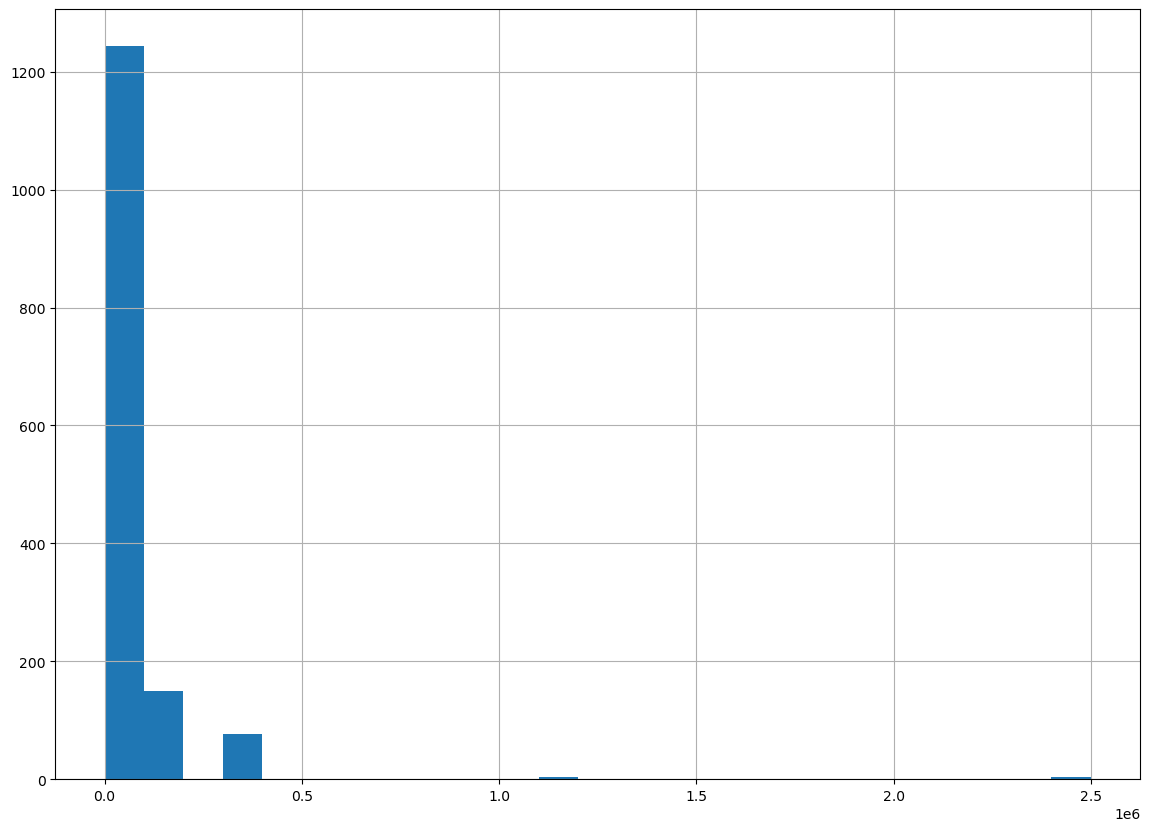

In [250]:
histogram_Value =train_df.Value.hist(bins =25, figsize=[14,10])

<Axes: >

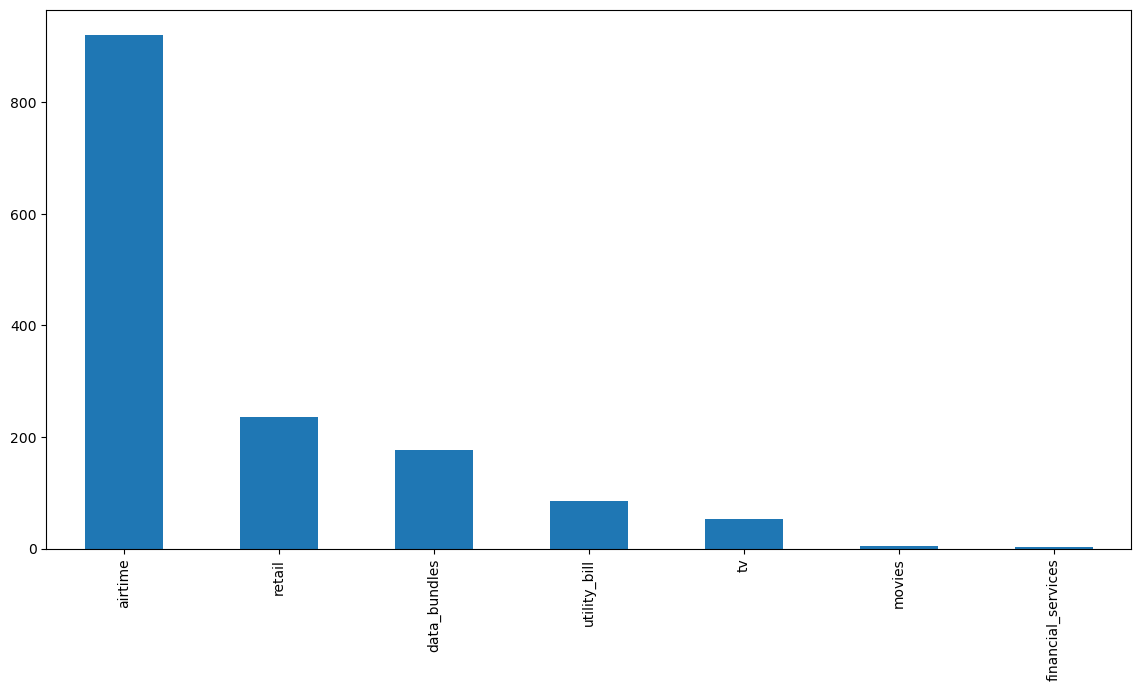

In [251]:

train_df['ProductCategory'].value_counts().plot(kind ='bar', figsize=[14,7])

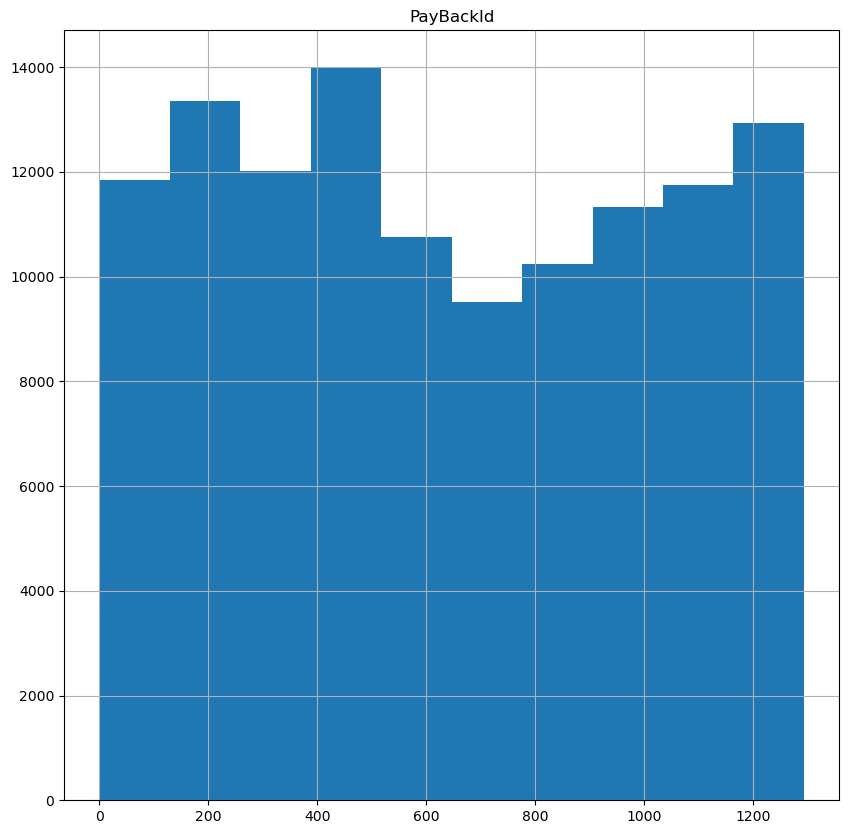

In [243]:
features = ['PayBackId'] # create a list of all numerical features
merged_data[features].hist(figsize=(10,10));

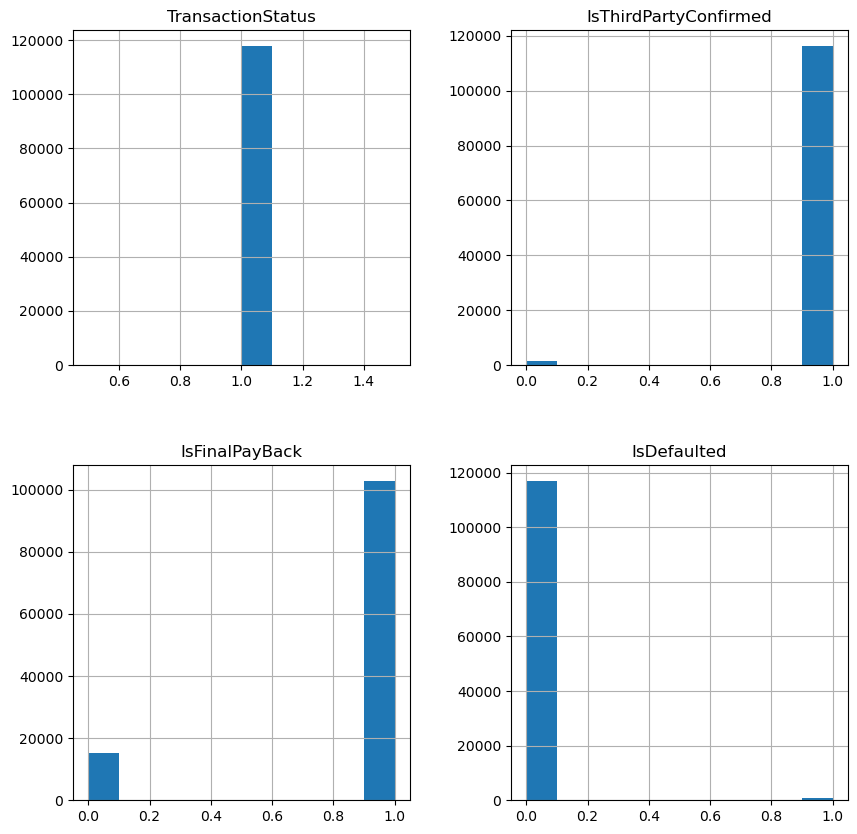

In [231]:
features = ['TransactionStatus','IsThirdPartyConfirmed','IsFinalPayBack','IsDefaulted'] # create a list of all numerical features
merged_data[features].hist(figsize=(10,10));


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

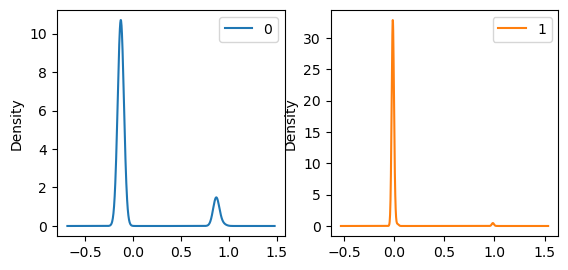

In [233]:
from sklearn.decomposition import PCA

# Apply PCA to the merged_data features
pca = PCA(n_components=2)  # Choose the desired number of components
pca_data = pca.fit_transform(merged_data[features])

# Plot the density plots using the transformed data
pd.DataFrame(pca_data).plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 10))


In [ ]:


# Group the data by product category and calculate repayment behavior statistics
grouped_data = merged_data.groupby("ProductCategory_x")["IsFinalPayBack"].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue')
plt.xlabel("Product Category")
plt.ylabel(" Behavior")
plt.title("Repayment Behavior Across Product Categories")
plt.xticks(rotation=45)
plt.show()


In [ ]:
merged_data['CustomerId'].nunique()